# Bibliotheek

Installeer OpenCV:

    https://pypi.org/project/opencv-python/
    
Plotten van foto's: 

    https://matplotlib.org/stable/tutorials/introductory/images.html
    
Installeer scikit-image: 
    
    https://scikit-image.org/docs/stable/install.html
    
scikit-images voorbeelden:

    https://scikit-image.org/docs/stable/auto_examples/index.html

In [1]:
import skimage
import cv2

import matplotlib.pyplot as plt
import numpy as np

# Continue beeld

In [ ]:
import cv2

camera = cv2.VideoCapture(1)  # Maak verbinding met camera ID 1

# Stel een vaste belichtingstijd in (indien ondersteund)
camera.set(cv2.CAP_PROP_AUTO_EXPOSURE, 0.25)  # Auto-exposure uit (driver-afhankelijk)
camera.set(cv2.CAP_PROP_EXPOSURE, -5)         # Handmatige belichting (waarde afhankelijk van driver)

while True:
    retval, frame = camera.read()
    if not retval:
        break

    # Toon live beeld in een venster
    cv2.imshow("Live feed", frame)

    # Stoppen als je op 'q' drukt
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


# Foto voorbeeld

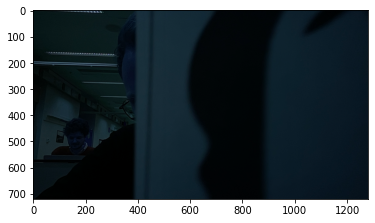

In [ ]:
camera = cv2.VideoCapture(0) # Maak verbinding met int : camera id
retval, frame = camera.read() # lees de camera uit

plt.imshow(frame) # geef het uitgelezen frame weer
camera.release() # verbreek de verbinding met de camera

# Camera instellingen

# Voorbeeld beeld analyse

RGB -> Grayscale: 

https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html#sphx-glr-auto-examples-color-exposure-plot-rgb-to-gray-py

Matplotlib colormaps:

https://matplotlib.org/stable/tutorials/colors/colormaps.html

## RGB -> Zwart wit
We hebben slechts interesse in de (relatieve) intensiteit van pixels. Wegens deze reden zetten we het beeld van kleur om naar zwart wit.

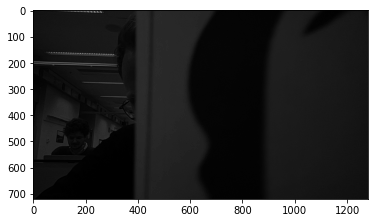

In [3]:
grayscale = skimage.color.rgb2gray(frame) # RGB -> grayscale

plt.imshow(grayscale, cmap=plt.cm.gray) # De colormap (cmap) is puur ter visuele weergave

In [4]:
print("RGB ndarray shape: ", frame.shape) # 3 kanaals
print("Grayscale ndarray shape: ", grayscale.shape) # 1 kanaals

RGB ndarray shape:  (720, 1280, 3)
Grayscale ndarray shape:  (720, 1280)


## Intensiteit per pixel kolom
We kunnen alle waarden van één kolom sommeren om de z.g. intensiteit van de betreffende kolom te bepalen. Deze intensiteit heeft (nog) geen eenheid, daarom noemen we dit `arbitrary units` (a.u.). 

Wanneer het lichtspectrum over de CMOS verspreid is zou je onderstaande code kunnen gebruiken om (bijna) direct een spectrogram te krijgen. Het pixel nummer is namenlijk te koppelen aan spatiële informatie en daarmee aan de frequentie van het licht.

Text(0, 0.5, 'intensity [a.u.]')

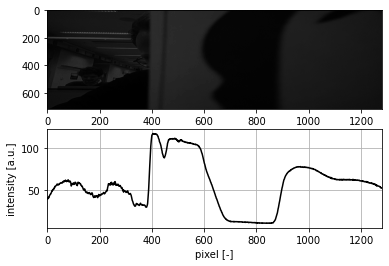

In [ ]:
I = grayscale.sum(axis=0) # row wise summation
x_pixel = np.arange(0,len(I),1)

plt.subplot(2,1,1)
plt.imshow(grayscale, cmap=plt.cm.gray, aspect="auto")
xmin, xmax = plt.xlim() # grab min max values from imshow

plt.subplot(2,1,2)
plt.plot(x_pixel,I, c='black')

plt.xlim(xmin,xmax) # set min max values

plt.grid()
plt.xlabel(r"pixel [-]")
plt.ylabel(r"intensity [a.u.]")